## 5.5 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해  
- 다항 회귀 : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현  
- 다항 회귀는 선형 회귀이다.   
(cf. <u>선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형이며 독립변수의 선형/비선형 여부와는 무관하다.</u>)  

In [3]:
## 비선형 함수를 선형 모델에 적용시키는 방법을 사용하여 구현

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]] 2*2 행렬
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]


In [4]:
# degree = 2인 2차 다항식으로 변환하기 위해 PoylnomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
## 3차 다항 회귀

def polynomial_func(X):
    y = 1 + 2*X + X**2+ X**3 # ** 제곱
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수값: \n',X)

y = polynomial_func(X)
print('삼차 다항식 계수값: \n',y)

일차 단항식 계수값: 
 [[0 1]
 [2 3]]
삼차 다항식 계수값: 
 [[ 1  5]
 [17 43]]


In [12]:
from sklearn.linear_model import LinearRegression

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 features: \n', poly_ftr)

# 선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정 값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)

print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape :',model.coef_.shape)

3차 다항식 계수 features: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape : (2, 10)


- 일차 단항식 계수 피처 : 2개
- 3차 다항식 Polynomial 변환 이후 다항식 계수 피처 : 10개로 변화    

In [13]:
# 다항 회귀 구현

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X + X**2 + X ** 3
    return y

# Pipeline 객체로 간소하게 다항식 피처 변환과 선형 회귀를 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomical 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomical 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


**cf. Pipeline**  
https://somnio100.tistory.com/91  

- 여러 변환 단계를 정확한 순서대로 실행할 수 있게 한다.
- Pipeline은 연속된 단계를 나타내는 이름,추정기 쌍의 목록(리스트)을 입력으로 받는다. 

### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀의 차수가 높을수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하지만, 과적합의 문제가 크게 발생하게 된다.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE는 0.40772896250986834입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE는 0.04320874987231761입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.40779144입니다.


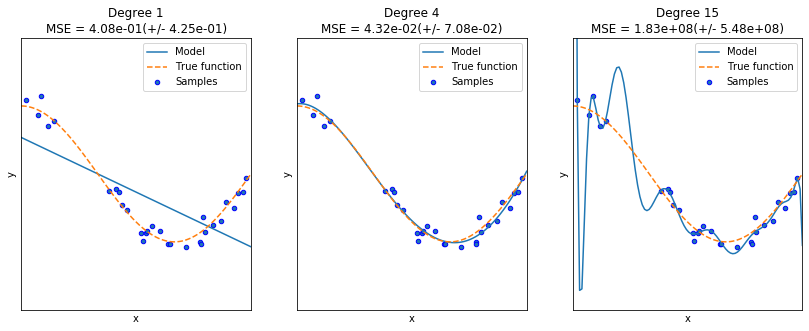

In [21]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees),i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

- 실선으로 표현된 예측 곡선 : 다항 회귀 예측 곡선  
- 점선으로 표현된 곡선 : 실제 데이터 세트 X,Y의 코사인 곡선  
- 학습 데이터 : 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동 값으로 추가해 구성  
- MSE 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것이다.  
---
1. Degree 1 예측 곡선 => **과소적합** 
    - 단순 선형 회귀와 같다.  
    - 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보인다.  
    - 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다.  
    - MSE : 약 0.407  
    

2. Degree 4 예측 곡선
    - 실제 데이터 세트와 유사한 모습이다.  
    - 변동하는 잡음까지는 예측하지 못했으나 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가지는 모델이다.  
    - MSE : 약 0.043 -> 가장 뛰어난 예측 성능  
    

3. Degree 15 예측 곡선 => **과적합**
    - MSE가 182815433가 될 정도로  터무니 없는 오류 값이 발생했다.  
    - 예측 곡선을 보면 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다.  
    

### 편향-분산 트레이드오프(Bias-Variance Trade off)

- 앞서 봤던 Degree 1 예측 곡선의 경우 지나치게 한 방향성으로 치우친 경향이 있었다. 이런 모델을 고편향(High Bias)성을 가졌다고 표현한다. 

- 반대로 Degree 15 예측 곡선의 경우 학습 데이터 각각의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었고 이런 모델을 고분산(High Variance)성을 가졌다고 표현한다.  

<img src='https://www.researchgate.net/profile/Vasiliki_Tassopoulou/publication/337382568/figure/fig2/AS:827118372007938@1574211795651/Graphical-illustration-of-bias-and-variance-5.ppm'>  
<center>편향과 분산의 고/저에 따른 표현</center>  

<img src='https://lh3.googleusercontent.com/proxy/sua-cGrtWMOGEMyCkSuJqRminqozAi_Ska7gRD5tDkpVyeoEZDflQESm9dbiZQK0rQxwnjrhNpbueUYZjRhB2VwpgMMUcUvO8HIXGGjIc3suDjbTNV_oO-zZvYos'>  
<center>편향과 분산에 따른 전체 오류 값 곡선</center>

- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다.  
- 높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉽다.  